1. (30%) Apply 𝑘-means and hierarchical clustering to the ORL face dataset. Set 𝑘 = 2 in 𝑘-means and select 2 clusters in hierarchical clustering. Do the clustering results match the two genders?

In [1]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [2]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


gender = final



In [3]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/homework_8/faces')

pixels.shape

X = pixels

# **K-means**

In [4]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print((kmeans.labels_))




[1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1]


Find **the best** accuracy by comparing the values predicted with the original ones for K-Means

In [5]:
count_kmeans = 0
for i, j in zip(kmeans.labels_, gender):
  if i == j:
    count_kmeans = count_kmeans + 1

print(count_kmeans)

accurancy_kmeans = (count_kmeans * 100) / len(gender)
print(accurancy_kmeans)

212
53.0


Checking if I get the same accuracy by the Confusion Matrix and also finding the best Confusion Matrix for K-Means


In [6]:
from sklearn.metrics import confusion_matrix

cm_kmeans = confusion_matrix(gender, (kmeans.labels_))

acc_cm_kmeans = np.trace(cm_kmeans) / np.sum(cm_kmeans)
print(acc_cm_kmeans)

0.53


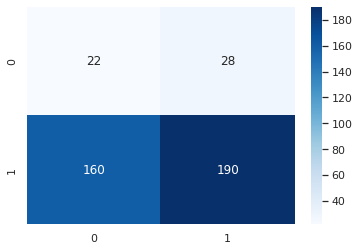

In [7]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues")

In [8]:
!pip install scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 4.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


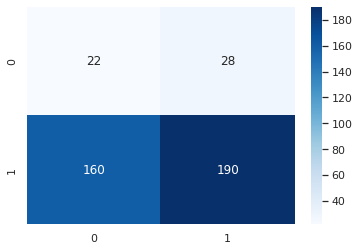

In [9]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm_kmeans))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2_kmeans = cm_kmeans[:, js]

ax = sns.heatmap(cm2_kmeans, annot=True, fmt="d", cmap="Blues")

Both accuracies are the same! Max ACC for K-Means

In [10]:
max_acc_kmeans = np.trace(cm2_kmeans) / np.sum(cm2_kmeans)
print("Max acc using K-Means:", 100* max_acc_kmeans,"%") 

Max acc using K-Means: 53.0 %


# **Hierarchical Clustering**

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)


[1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1]


Find **the best** accuracy by comparing the values predicted with the original ones for Hierarchical Clustering

In [12]:
count_cluster = 0
for i, j in zip(cluster.labels_, gender):
  if i == j:
    count_cluster = count_cluster + 1

print(count_cluster)

accurancy_cluster = (count_cluster * 100) / len(gender)
print(accurancy_cluster)

207
51.75


Checking if I get the same accuracy by the Confusion Matrix and also finding the best Confusion Matrix for Hierarchical Clustering

0.5175


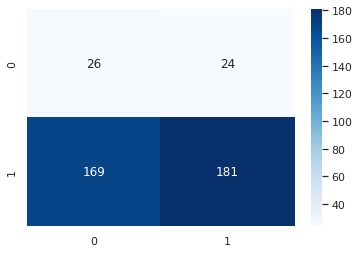

In [13]:
cm_hierar = confusion_matrix(gender, (cluster.labels_))

acc_cm_hierar = np.trace(cm_hierar) / np.sum(cm_hierar)
print(acc_cm_hierar)

ax = sns.heatmap(cm_hierar, annot=True, fmt="d", cmap="Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


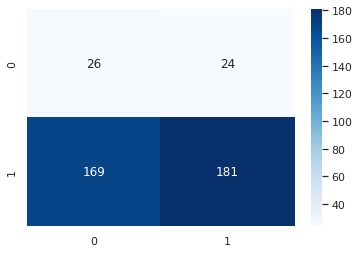

In [14]:
indexes = linear_assignment(_make_cost_m(cm_hierar))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2_hierar = cm_hierar[:, js]

ax = sns.heatmap(cm2_hierar, annot=True, fmt="d", cmap="Blues")

Both accuracies are the same! Max ACC for K Means Hierarchical Clustering

In [15]:
max_acc_hierar_ = np.trace(cm2_hierar) / np.sum(cm2_hierar)
print("Max acc using Hierarchical clustering:", 100* max_acc_hierar_,"%") 

Max acc using Hierarchical clustering: 51.74999999999999 %


Conclusion:

Both algorithms had the worst predictions comparting to the Supervisory Learning ones implemented last homework. One of the reasons is that they don't have access to the output, and it's hard to cluster between two groups when one possible work has so fewer data compared to the other one. 

It seems that unsupervised learning suffered less bias for this application since it didn't have access to the labels.